In [1]:
import sys
sys.path.append("..")

from pytorch_utils import *
from preprocess import *
from model_container import ModelContainer

In [2]:
unet = ModelContainer(
    nnet = get_instrument_segmentation_model_base(
        Models.UNET
    )
)

In [3]:
unet.load_loader("pickled/unet_128_160.pkl")
# input_, output_ = load_endovis_videos()
# input_to_tensor = preprocess_endovis_training_images(input_, (128, 160))
# output_to_tensor = preprocess_endovis_target_images(output_, (128, 160))

# unet.set_dataset(input_to_tensor, output_to_tensor, 64)
unet.save_loader("unet_128_160")
with open("pickled/training_128_160.pkl", "wb") as fp: 
    torch.save(unet._loader, fp)

In [12]:
with open("pickled/training_128_160.pkl", "wb") as fp: 
    torch.save(unet._loader, fp)

Pickle file unet_128_160 already exists, ignoring


In [4]:
unet.set_optimizer(torch.optim.Adam(params = unet._network.parameters(), lr = 0.01))
unet.set_cost(torch.nn.BCEWithLogitsLoss())

In [5]:
unet.train(35)

Loss: 0.6857501268386841
Loss: 0.45882728695869446
Loss: 0.3102807402610779
Loss: 0.23205675184726715
Loss: 0.14900480210781097
Loss: 0.12404273450374603
Loss: 0.10884077847003937
Loss: 0.09221058338880539
Loss: 0.08240720629692078
Loss: 0.07123710215091705
Loss: 0.07965219765901566
Loss: 0.06756043434143066
Loss: 0.07069357484579086
Loss: 0.06527328491210938
Loss: 0.06825166940689087
Loss: 0.0695519968867302
Loss: 0.0700569823384285
Loss: 0.06283765286207199
Loss: 0.06029020994901657
Loss: 0.06743469834327698
Loss: 0.06367184221744537
Loss: 0.06113576516509056
Loss: 0.06606923788785934
Loss: 0.064022496342659
Loss: 0.06239910423755646
Loss: 0.06019744277000427
Loss: 0.05912317335605621
Loss: 0.06310699135065079
Loss: 0.057423513382673264
Loss: 0.059637006372213364
Loss: 0.061472903937101364
Loss: 0.05958349257707596
Loss: 0.06277576833963394
Loss: 0.05914619192481041
Loss: 0.06289605796337128
Loss: 0.05523799732327461
Loss: 0.061802227050065994
Loss: 0.05651676282286644
Loss: 0.055892

In [11]:
with open("pickled\\unet_resnet50_torch.pkl", "wb") as fp:
    torch.save(unet._network.state_dict(), fp)

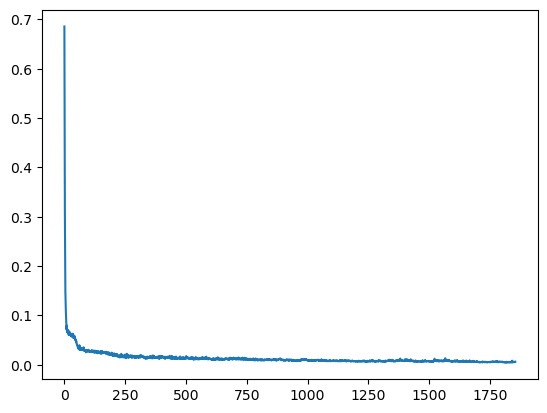

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(unet._losses)